# Credit Card Default Risk Prediction
This study predicts whether a customer will default in the next month using their six months of historical repayment behavior.


### Variables
There are 25 variables:

Customer Information

- ID – Unique client identifier

- SEX – Gender (1=male, 2=female)

- AGE – Age in years

- EDUCATION – Education level (1=graduate school, 2=university, 3=high school, 4=others)

- MARRIAGE – Marital status (1=married, 2=single, 3=others)

Credit Information

- LIMIT_BAL – Total credit limit assigned to the customer

Repayment Status (6 Months History)

- PAY_0 to PAY_6 – Monthly repayment status from April to September 2005(-1 = paid duly, 1–9 = months of payment delay)

Billing Amounts (6 Months)

- BILL_AMT1 to BILL_AMT6 – Monthly bill amounts from April to September 2005

Payment Amounts (6 Months)

- PAY_AMT1 to PAY_AMT6 – Monthly payment amounts from April to September 2005

Target Variable

- default.payment.next.month – Indicates whether the customer defaulted the following month (1 = Yes, 0 = No)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv('credit_card_default_data.csv')
df.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
15530,15531,NaN,t1,1,2,30,0,0,0,0,...,149399,150796,88463,5346,7056,7656,5885,3345,3363,0
16894,16895,140000,1,1,2,32,0,0,0,0,...,73225,56999,61050,5890,9395,15000,NaN,5000,7086,NaN
9455,9456,130000,X1,2,2,37,0,NaN,0,0,...,82476,84205,84162,3857,NaN,2924,NaN,3009,3116,0


### Data Understanding

In [3]:
# Structure
df.shape

(30100, 25)

In [4]:
# Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30100 entries, 0 to 30099
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30100 non-null  int64 
 1   LIMIT_BAL                   27102 non-null  object
 2   SEX                         27150 non-null  object
 3   EDUCATION                   27007 non-null  object
 4   MARRIAGE                    27110 non-null  object
 5   AGE                         27092 non-null  object
 6   PAY_0                       27051 non-null  object
 7   PAY_2                       27082 non-null  object
 8   PAY_3                       27054 non-null  object
 9   PAY_4                       27059 non-null  object
 10  PAY_5                       27083 non-null  object
 11  PAY_6                       27061 non-null  object
 12  BILL_AMT1                   27081 non-null  object
 13  BILL_AMT2                   27127 non-null  ob

In [5]:
# Statistical Summary
df.describe()

,ID
count,30100.000000
mean,15000.296545
std,8660.557664
min,1.000000
25%,7502.750000
50%,14998.500000
75%,22497.250000
max,30000.000000


In [6]:
# Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,27150,27007,27110
unique,106,183,125
top,2,2,2
freq,15570,12018,13726


In [8]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,27051,27082,27054,27059,27083,27061
unique,256,226,214,220,219,221
top,0,0,0,0,0,0
freq,12617,13495,13460,14115,14519,13997


In [9]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,27081,27127,27095,27022,27124,27021
unique,21169,20816,20467,20031,19691,19214
top,0,0,0,0,0,0
freq,1700,2161,2448,2757,2983,3453


In [10]:
# Unique Values
for col in df.columns: 
    print(col) 
    print(df[col].unique())
    

ID
[    1     2     3 ... 29998 29999 30000]
LIMIT_BAL
['20000' '120000' '90000' ... '27000f0' '16000r0' '80A000']
SEX
['2' '1' nan 'g2' 'Q2' 'p1' 'I1' 'k2' 's2' 'O2' 'o2' 'X2' 'f2' 'J2' 'L2'
 'h1' 'F2' 'i2' 'Z1' 'D1' 'j2' 's1' 'I2' 'z1' 'u2' 'U2' 'R2' 'v2' 'h2'
 'A2' 'M2' 'C2' 'X1' 'w1' 'F1' 'B2' 'v1' 'N1' 'Y2' 'H2' 'n1' 'm2' 'T1'
 'c2' 'S2' 'K1' 'e2' 'U1' 'K2' 'd1' 'Q1' 'd2' 'r2' 'l1' 'n2' 'o1' 'O1'
 'f1' 'b1' 'l2' 'D2' 'q2' 'b2' 'J1' 'e1' 'V2' 'P1' 'a2' 'H1' 'G1' 't1'
 'M1' 'j1' 'p2' 'Y1' 'x1' 'V1' 'w2' 'N2' 'y1' 'B1' 'k1' 'E1' 'W2' 't2'
 'c1' 'R1' 'C1' 'z2' 'x2' 'r1' 'q1' 'm1' 'G2' 'A1' 'Z2' 'g1' 'T2' 'E2'
 'P2' 'S1' 'a1' 'L1' 'u1' 'W1' 'y2' 'i1']
EDUCATION
['2' nan '1' '3' 'M3' 'Z1' 'f2' '5' 'M1' 'O1' 'h2' 'a1' 'v1' 'y3' 'f3'
 'O3' '4' 's5' 'q1' 'h3' 'b1' 'f1' 'o2' '6' 't1' 'R1' 'n1' 'V1' 'x3' 'E1'
 'C1' 'T3' 'P2' 'S2' 'U3' 'A2' 'T1' 'i2' 'w3' 'p3' 'm2' 'H2' 'H3' 'I2'
 'H1' 't2' 'B2' 'a3' 'a2' 's1' 'S1' 'M2' 'J2' 'e1' 'P3' 'T2' 'Y1' 'K2'
 'y2' 'C2' 'L1' 'I3' 'W2' 'k1' 'n2' 'w1' 'L

### Data Cleaning

In [11]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.shape 

(30084, 25)

In [12]:
# Remove Irrelevant Columns
df.drop("ID", axis=1, inplace=True)

In [13]:
# Rename Columns
df.rename(columns={
    "default payment next month":"DEFAULT"
}, inplace=True)

In [14]:
# Handling Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)

In [15]:
# Columns that need only digit extraction (categorical-like)
digit_cols = ["SEX", "EDUCATION", "MARRIAGE", "AGE"]

for col in digit_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.extract(r"(\d+)")
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")


# Numeric columns that may contain symbols
numeric_cols = [
    "LIMIT_BAL",
    "PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6",
    "BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6",
    "PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"
]

for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r"[^\d\.\-]", "", regex=True)
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")


# Target column
df["DEFAULT"] = (
    df["DEFAULT"]
    .astype(str)
    .str.extract(r"(\d)")
)

df["DEFAULT"] = pd.to_numeric(df["DEFAULT"], errors="coerce")

As seen previously, some categories are mislabeled or undocumented.

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3). 

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

In [16]:
# Handling Incorrect Datatypes
df.loc[df.EDUCATION.isin([0,5,6]), "EDUCATION"] = 4
df.loc[df.MARRIAGE == 0, "MARRIAGE"] = 3

In [17]:
# Handling Nan values
num_cols = [
    'LIMIT_BAL', 'AGE',
    'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
    'BILL_AMT1','BILL_AMT2','BILL_AMT3',
    'BILL_AMT4','BILL_AMT5','BILL_AMT6',
    'PAY_AMT1','PAY_AMT2','PAY_AMT3',
    'PAY_AMT4','PAY_AMT5','PAY_AMT6',
    'SEX', 'EDUCATION', 'MARRIAGE', 'DEFAULT'
]

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

### Exploratory Data Anaysis

In [18]:
# Default Values Count
df["DEFAULT"].value_counts()

DEFAULT
0.0    24107
1.0     5977
Name: count, dtype: int64

In [19]:
# Default by Gender
df.groupby(['SEX', 'DEFAULT']).size()

SEX  DEFAULT
1.0  0.0         8424
     1.0         2357
2.0  0.0        15683
     1.0         3620
dtype: int64

In [20]:
pd.crosstab(df.SEX, df.DEFAULT)

DEFAULT,0.0,1.0
SEX,,
1.0,8424,2357
2.0,15683,3620


In [21]:
df[["SEX", "DEFAULT"]].groupby(['SEX']).mean().sort_values(by='DEFAULT')

,DEFAULT
SEX,
2.0,0.187536
1.0,0.218625


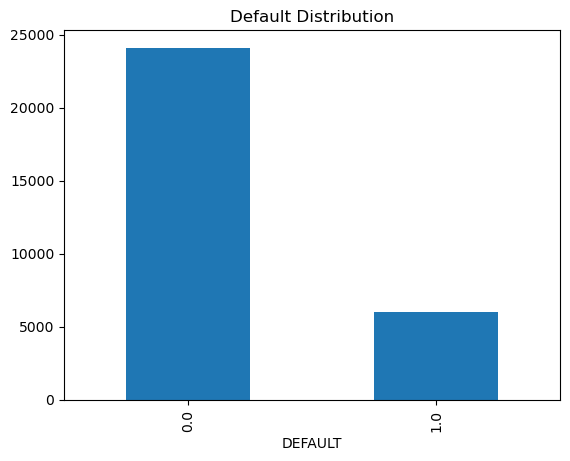

In [22]:
# Default Distribution
df["DEFAULT"].value_counts().plot(kind="bar")
plt.title("Default Distribution")
plt.show()

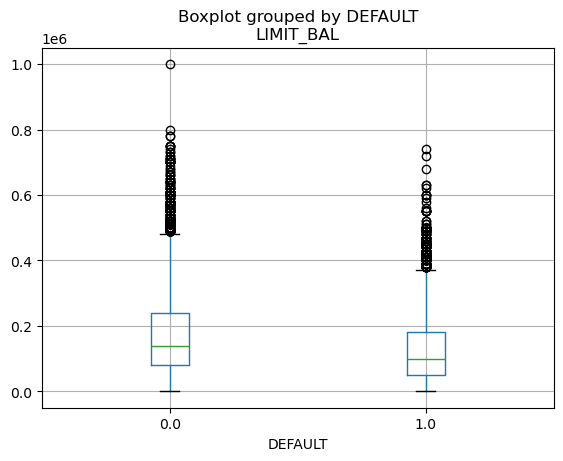

In [23]:
# Credit Limit Vs Default
df.groupby("DEFAULT")["LIMIT_BAL"].mean()
df.boxplot(column="LIMIT_BAL", by="DEFAULT")
plt.show()

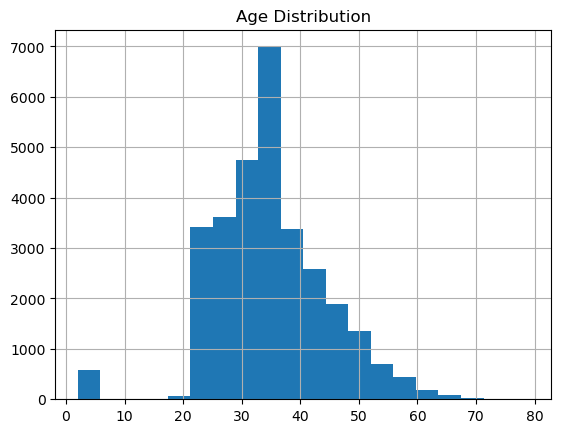

In [24]:
# Age Distribution
df["AGE"].hist(bins=20)
plt.title("Age Distribution")
plt.show()

Categorical: SEX, MARRIAGE, EDUCATION, see both how our dataset is divided and if there are sparse classes which can cause overfit of our models.

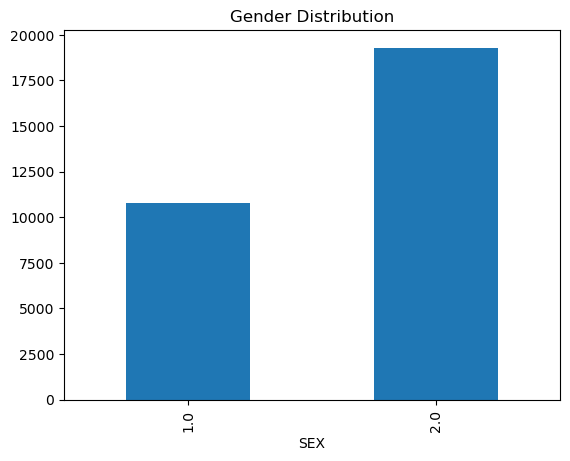

In [25]:
# Gender Distribution
df["SEX"].value_counts().sort_index().plot(kind="bar")
plt.title("Gender Distribution")
plt.show()

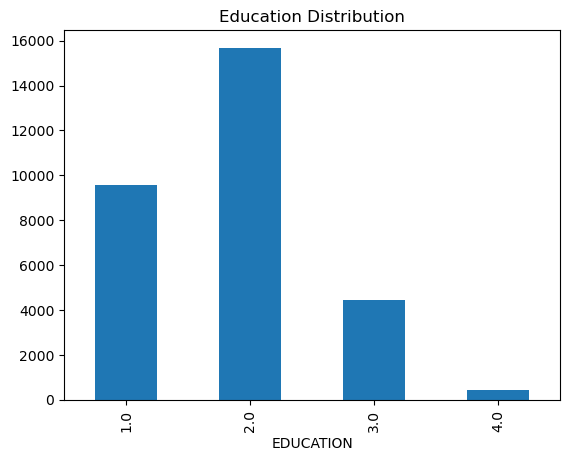

In [26]:
# Education Distribution
df["EDUCATION"].value_counts().sort_index().plot(kind="bar")
plt.title("Education Distribution")
plt.show()

Considering that about 22% of the customers will default, we see a couple of things:
* there are significantly more women than men
* men are most likely going to default the next month


In [27]:
# Bivariate categorical-target analysis (Target Rate Analysis)
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['percentage'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [28]:
corr_2_cols('EDUCATION', 'DEFAULT')

DEFAULT,0.0,1.0,percentage
EDUCATION,,,
1.0,7894,1655,0.173317
2.0,12391,3299,0.210261
3.0,3430,996,0.225034
4.0,392,27,0.064439


It seems that the higher is the education, the lower is the probability of defaulting the next month.

In [29]:
corr_2_cols('MARRIAGE', 'DEFAULT')

DEFAULT,0.0,1.0,percentage
MARRIAGE,,,
1.0,9672,2626,0.213531
2.0,14165,3272,0.187647
3.0,270,79,0.226361


Here it seems that married people are most likely to default as well as the   Other category.

creating a new interaction feature (SE_MA) by combining SEX and MARRIAGE to capture demographic behavior differences.

In [30]:
# Feature Engineering
df['SE_MA'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SE_MA'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SE_MA'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SE_MA'] = 3 #other man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SE_MA'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SE_MA'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SE_MA'] = 6 #other woman

corr_2_cols('SE_MA', 'DEFAULT')

DEFAULT,0.0,1.0,percentage
SE_MA,,,
1,3229,1004,0.237184
2,5106,1316,0.204921
3,89,37,0.293651
4,6443,1622,0.201116
5,9059,1956,0.177576
6,181,42,0.188341


Married men have a higher probability of defaulting, single men have nothing special with respect to the all population and single women have a lower probability of defaulting

### Model Building

In [31]:
# Define Featues and Target 
from sklearn.model_selection import train_test_split

features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA',]
y = df['DEFAULT'].copy() # target
x = df[features].copy()

# Stratified Train-Test Split
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.3, random_state=42,stratify=y)

In [32]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_tr = scaler.fit_transform(xtrain)
x_te = scaler.transform(xtest)

For Credit Card Default Prediction (Imbalanced Dataset), the most suitable models are:

- Logistic Regression

- Decision Tree

- Random Forest

- XGBoost

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

log_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

log_model.fit(x_tr, ytrain)

y_pred_log = log_model.predict(x_te)

print("\n=== Logistic Regression ===")
print(classification_report(ytest, y_pred_log))
print("F1 Score:", f1_score(ytest, y_pred_log))



=== Logistic Regression ===
              precision    recall  f1-score   support

         0.0       0.88      0.70      0.78      7233
         1.0       0.34      0.61      0.44      1793

    accuracy                           0.69      9026
   macro avg       0.61      0.66      0.61      9026
weighted avg       0.77      0.69      0.71      9026

F1 Score: 0.4356829948227798


In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced",
    max_depth=8
)

dt_model.fit(x_tr, ytrain)

y_pred_dt = dt_model.predict(x_te)

print("\n=== Decision Tree ===")
print(classification_report(ytest, y_pred_dt))
print("F1 Score:", f1_score(ytest, y_pred_dt))



=== Decision Tree ===
              precision    recall  f1-score   support

         0.0       0.89      0.73      0.80      7233
         1.0       0.37      0.62      0.46      1793

    accuracy                           0.71      9026
   macro avg       0.63      0.68      0.63      9026
weighted avg       0.78      0.71      0.74      9026

F1 Score: 0.4620161457255227


In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score

# Calculate imbalance ratio
scale_pos_weight = (ytrain == 0).sum() / (ytrain == 1).sum()

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,  # handles imbalance
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(x_tr, ytrain)

# Predict probabilities
y_probs_xgb = xgb_model.predict_proba(x_te)[:, 1]

# Apply threshold (important for credit risk)
THRESHOLD = 0.30
y_pred_xgb = (y_probs_xgb >= THRESHOLD).astype(int)

print("\n=== XGBoost ===")
print(classification_report(ytest, y_pred_xgb))
print("F1 Score:", f1_score(ytest, y_pred_xgb))


=== XGBoost ===
              precision    recall  f1-score   support

         0.0       0.92      0.46      0.61      7233
         1.0       0.28      0.85      0.42      1793

    accuracy                           0.53      9026
   macro avg       0.60      0.65      0.51      9026
weighted avg       0.79      0.53      0.57      9026

F1 Score: 0.4187586206896552


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(x_tr, ytrain)

# Get probabilities
y_probs = rf_model.predict_proba(x_te)[:, 1]

y_pred_dt = (y_probs >= 0.3).astype(int)

print("\n=== Random Forest ===")
print(classification_report(ytest, y_pred_dt))
print("F1 Score:", f1_score(ytest, y_pred_dt))


=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      7233
         1.0       0.48      0.50      0.49      1793

    accuracy                           0.79      9026
   macro avg       0.68      0.68      0.68      9026
weighted avg       0.80      0.79      0.80      9026

F1 Score: 0.4896949711459192


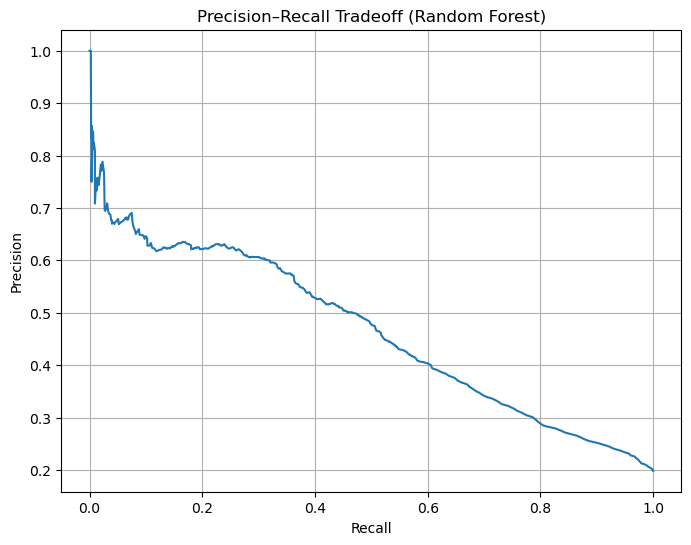

In [37]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(ytest, y_probs)

plt.figure(figsize=(8,6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Tradeoff (Random Forest)")
plt.grid(True)
plt.show()

In [38]:
# Comparing Random Forest Classifiers Threshold

threshold_results = []

print("Threshold    F1 Score")
print("----------------------")

for t in np.arange(0.1, 0.4, 0.1):
    y_pred = (y_probs >= t).astype(int)
    f1 = f1_score(ytest, y_pred)
    
    threshold_results.append((round(t,2), f1))
    
    print(f"{round(t,2)}       {round(f1,4)}")

# Convert to DataFrame for easy comparison
threshold_df = pd.DataFrame(
    threshold_results,
    columns=["Threshold", "F1 Score"]
)

Threshold    F1 Score
----------------------
0.1       0.3966
0.2       0.476
0.3       0.4896
0.4       0.449


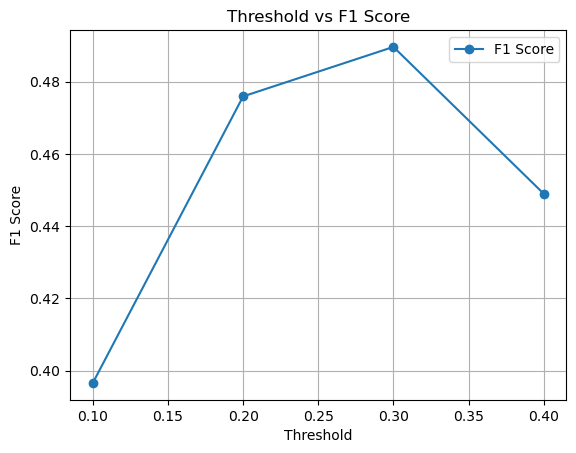

In [39]:
# Threshold Vs F1 Score
import matplotlib.pyplot as plt

threshold_df.plot(x="Threshold", y="F1 Score", marker="o")

plt.title("Threshold vs F1 Score")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.grid(True)

plt.show()

In [40]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_dt)
print(cm)


[[6278  955]
 [ 902  891]]


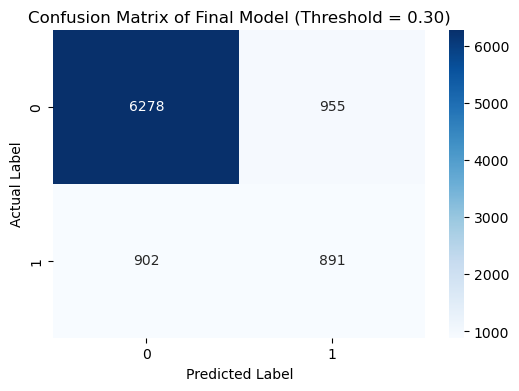

In [41]:
# Confusion Matrix Distribution
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix of Final Model (Threshold = 0.30)")

plt.show()


In [48]:
import mlflow
import joblib
mlflow.set_tracking_uri("file:./mlruns")
joblib.dump(rf_model, "credit_default_rf_balanced.joblib")

['credit_default_rf_balanced.joblib']

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, f1_score

THRESHOLD = 0.30

mlflow.set_tracking_uri("file:./mlruns")
mlflow.set_experiment("Credit_Default_Risk")


c:\Users\harsh\anaconda3\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:177: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance.
  return FileStore(store_uri, store_uri)


<Experiment: artifact_location=('file:d:/Projects/Cdac - projects/Credit Card Default Risk '
 'Prediction/mlruns/969966881313628656'), creation_time=1770805721418, experiment_id='969966881313628656', last_update_time=1770805721418, lifecycle_stage='active', name='Credit_Default_Risk', tags={}>

In [50]:
with mlflow.start_run(run_name="LogisticRegression"):

    model = LogisticRegression(max_iter=1000, class_weight="balanced")
    model.fit(x_tr, ytrain)

    y_probs = model.predict_proba(x_te)[:, 1]
    ypred = (y_probs >= THRESHOLD).astype(int)

    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("threshold", THRESHOLD)

    mlflow.log_metric("accuracy", accuracy_score(ytest, ypred))
    mlflow.log_metric("recall", recall_score(ytest, ypred))
    mlflow.log_metric("f1_score", f1_score(ytest, ypred))

    mlflow.sklearn.log_model(model, "model")


2026/02/11 18:05:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [51]:
with mlflow.start_run(run_name="DecisionTree"):

    model = DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced"
    )

    model.fit(x_tr, ytrain)

    y_probs = model.predict_proba(x_te)[:, 1]
    ypred = (y_probs >= THRESHOLD).astype(int)

    mlflow.log_param("model", "DecisionTree")
    mlflow.log_param("threshold", THRESHOLD)

    mlflow.log_metric("accuracy", accuracy_score(ytest, ypred))
    mlflow.log_metric("recall", recall_score(ytest, ypred))
    mlflow.log_metric("f1_score", f1_score(ytest, ypred))

    mlflow.sklearn.log_model(model, "model")


2026/02/11 18:05:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [52]:
with mlflow.start_run(run_name="RandomForest_balanced"):

    model = RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced"
    )

    model.fit(x_tr, ytrain)

    y_probs = model.predict_proba(x_te)[:, 1]
    ypred = (y_probs >= THRESHOLD).astype(int)

    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_estimators", 300)
    mlflow.log_param("threshold", THRESHOLD)

    mlflow.log_metric("accuracy", accuracy_score(ytest, ypred))
    mlflow.log_metric("recall", recall_score(ytest, ypred))
    mlflow.log_metric("f1_score", f1_score(ytest, ypred))

    mlflow.sklearn.log_model(model, "model")


2026/02/11 18:05:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [53]:
for threshold in [0.5, 0.4, 0.3, 0.2]:
    with mlflow.start_run(run_name=f"RF_threshold_{threshold}"):

        ypred_rf = (y_probs >= threshold).astype(int)

        accuracy = accuracy_score(ytest, ypred_rf)
        recall = recall_score(ytest, ypred_rf)
        f1 = f1_score(ytest, ypred_rf)

        mlflow.log_param("threshold", threshold)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)


In [ ]:
# http://localhost:5000